# DATA OUTLIERS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import seaborn as sns
import data_utils
import importlib

importlib.reload(data_utils)

# Read the csv
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost,csv_teams = data_utils.load_data()
pd.options.mode.use_inf_as_na = True

/tmp/ipykernel_20418/3575686999.py:17: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


### outliers formular

In [2]:
# Define the Z-score method to find outliers
# A Z-score measures how many standard deviations a data point is from the mean. If the Z-score is greater than 3 or less than -3, the data point is typically considered an outlier.
# Formula:
# Z= (x−μ)/σ
# Where:
# x is the data point.
# μ is the mean.
# σ is the standard deviation.
def z_score_outliers(data):
    z_scores = (data - data.mean()) / data.std()
    return data[(z_scores > 3) | (z_scores < -3)]

# Define the IQR method to find outliers
# The Interquartile Range (IQR) is the range between the 25th and 75th percentiles. Outliers can be defined as data points that fall 
# below
# Q1−1.5×IQR
# or above:
# Q3+1.5×IQR
# Where:
# Q1 is the 25th percentile.
# Q3 is the 75th percentile.
# IQR=Q3−Q1.
def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

## Outliers in csv_coaches

Outliers detected using Z-score method:
won: [] (Outliers beyond 3 standard deviations)
lost: [] (Outliers beyond 3 standard deviations)
post_wins: [] (Outliers beyond 3 standard deviations)
post_losses: [] (Outliers beyond 3 standard deviations)

Outliers detected using IQR method:
won: [] (Outliers outside 1.5 * IQR range)
lost: [29, 30] (Outliers outside 1.5 * IQR range)
post_wins: [4, 3, 4, 6, 6, 6, 5, 3, 3, 3, 4, 6, 6, 7, 3, 4, 6, 7, 6, 7, 3, 3, 3, 5, 5, 3, 7, 3, 3, 7, 6, 3] (Outliers outside 1.5 * IQR range)
post_losses: [] (Outliers outside 1.5 * IQR range)


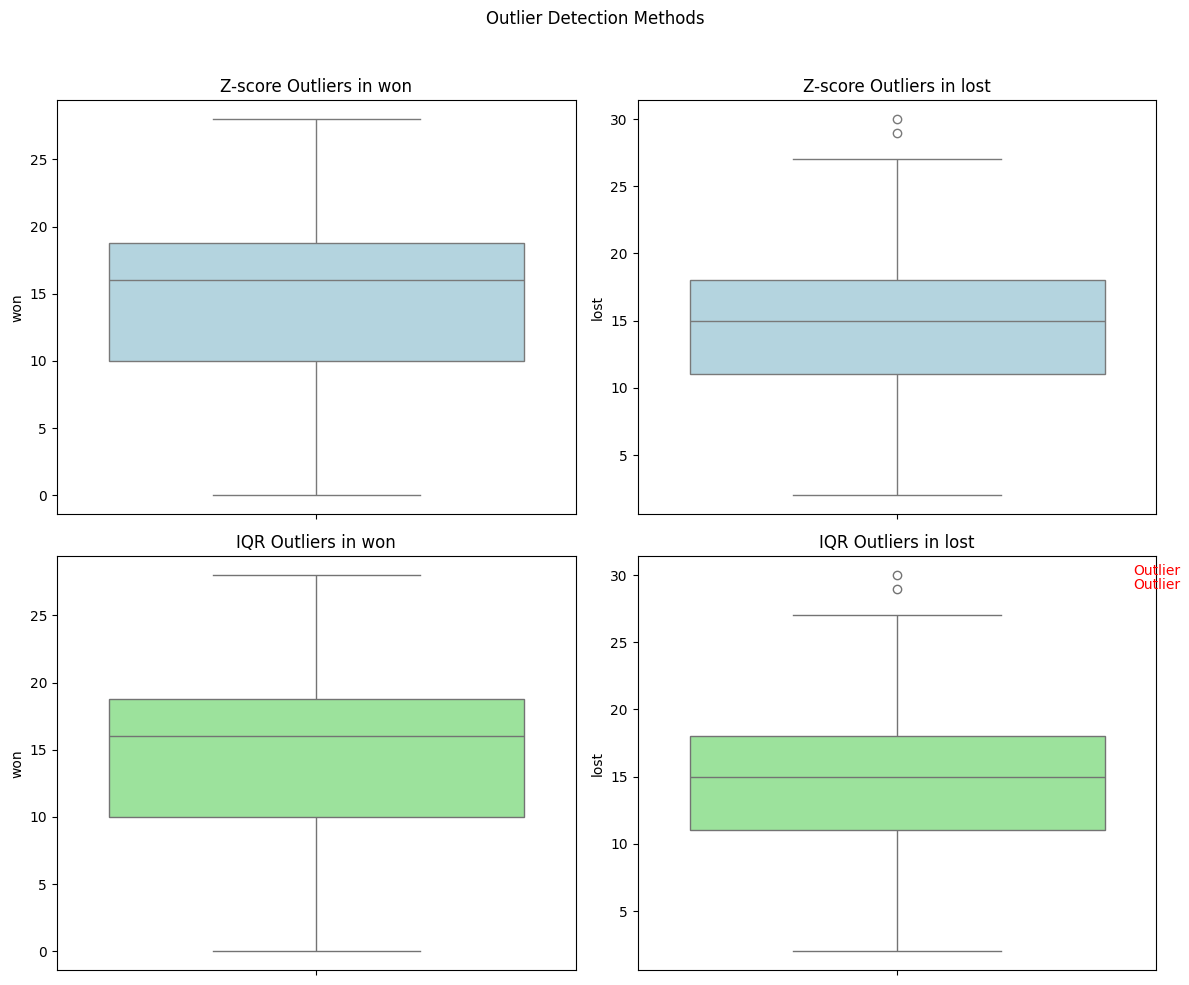

In [3]:

df = pd.DataFrame(csv_coaches)

# Apply the outlier detection methods to 'won', 'lost', 'post_wins', and 'post_losses'
z_score_outliers_dict = {col: z_score_outliers(df[col]) for col in ['won', 'lost', 'post_wins', 'post_losses']}
iqr_outliers_dict = {col: iqr_outliers(df[col]) for col in ['won', 'lost', 'post_wins', 'post_losses']}


# Print outliers detected by the Z-score method
print("Outliers detected using Z-score method:")
for col, outliers in z_score_outliers_dict.items():
    print(f"{col}: {outliers.tolist()} (Outliers beyond 3 standard deviations)")

# Print outliers detected by the IQR method
print("\nOutliers detected using IQR method:")
for col, outliers in iqr_outliers_dict.items():
    print(f"{col}: {outliers.tolist()} (Outliers outside 1.5 * IQR range)")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Outlier Detection Methods')

# Boxplot for Z-score method
for ax, col in zip(axes[0], ['won', 'lost', 'post_wins', 'post_losses']):
    sns.boxplot(ax=ax, y=df[col], color='lightblue')
    ax.set_title(f'Z-score Outliers in {col}')
    for outlier in z_score_outliers_dict[col]:
        ax.text(0.5, outlier, 'Outlier', color='red', ha='center')

# Boxplot for IQR method
for ax, col in zip(axes[1], ['won', 'lost', 'post_wins', 'post_losses']):
    sns.boxplot(ax=ax, y=df[col], color='lightgreen')
    ax.set_title(f'IQR Outliers in {col}')
    for outlier in iqr_outliers_dict[col]:
        ax.text(0.5, outlier, 'Outlier', color='red', ha='center')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Outliers in csv_playersTeams

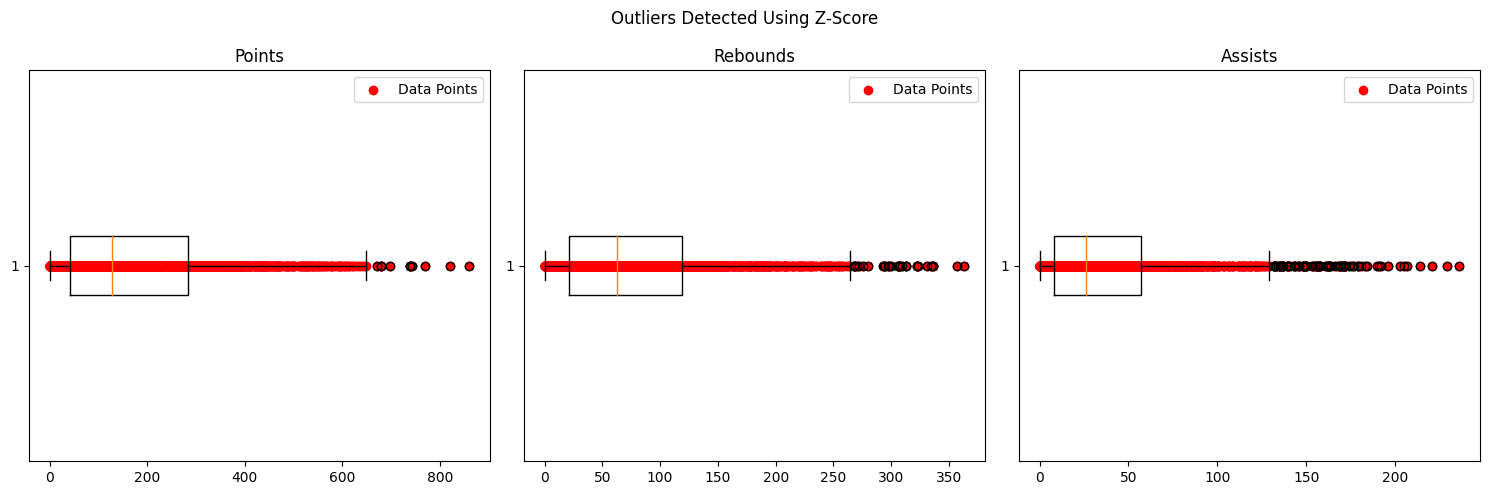

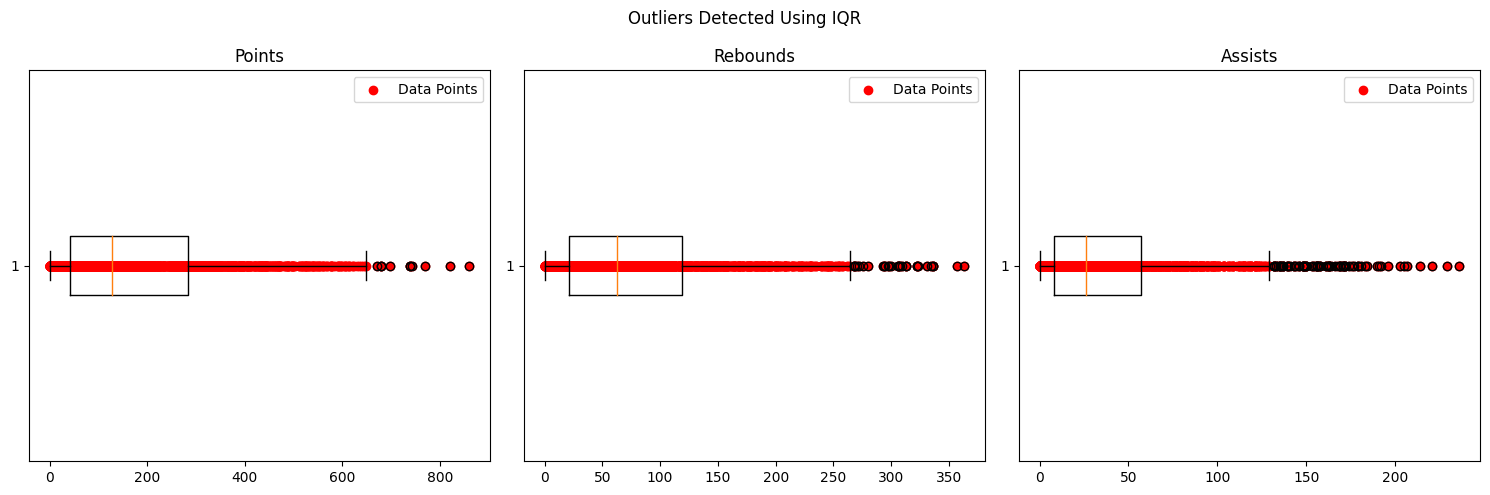

In [4]:
df = pd.DataFrame(csv_playersTeams)


cols = ["points", "rebounds","assists"]
# Find outliers using Z-score and IQR
# outliers_dict = {}


# Find outliers using Z-score
z_outliers_dict = {}
for column in cols:
    z_outliers = z_score_outliers(df[column])
    
    if not z_outliers.empty:
        z_outliers_dict[column] = {
            "Z-score Outliers": z_outliers.values,
        }
        # Check if outliers were detected before attempting to plot
if len(z_outliers_dict) > 0:
    # Plot outliers
    fig, axes = plt.subplots(1, len(z_outliers_dict), figsize=(15, 5))
    fig.suptitle('Outliers Detected Using Z-Score')

    for i, (column, outliers) in enumerate(z_outliers_dict.items()):
        axes[i].boxplot(df[column], vert=False)
        axes[i].set_title(f'{column.capitalize()}')
        axes[i].scatter(df[column], np.ones_like(df[column]), color='red', label="Data Points")
        axes[i].legend()

    plt.tight_layout()
    plt.show()
else:
    print("No outliers using Z-score detected.")

# Find outliers using IQR
IQR_outliers_dict = {}
for column in cols:
    iqr_outliers_data = iqr_outliers(df[column])
    
    if not iqr_outliers_data.empty:
        IQR_outliers_dict[column] = {
            "IQR Outliers": iqr_outliers_data.values
        }
        # Check if outliers were detected before attempting to plot
if len(IQR_outliers_dict) > 0:
    # Plot outliers
    fig, axes = plt.subplots(1, len(IQR_outliers_dict), figsize=(15, 5))
    fig.suptitle('Outliers Detected Using IQR')

    for i, (column, outliers) in enumerate(IQR_outliers_dict.items()):
        axes[i].boxplot(df[column], vert=False)
        axes[i].set_title(f'{column.capitalize()}')
        axes[i].scatter(df[column], np.ones_like(df[column]), color='red', label="Data Points")
        axes[i].legend()

    plt.tight_layout()
    plt.show()
else:
    print("No outliers using IQR detected.")